In [1]:
# Prepare Python Library
import pandas as pd
from datetime import datetime

# Load Dataframe
data = pd.read_csv('/kaggle/input/hose-market/CafeF.HSX.Upto07.03.2025.csv')

# Rename column <DTYYYYMMDD> to Date
data.rename(columns={'<DTYYYYMMDD>': '<Date>'}, inplace=True)

# Convert <Date> from number to date format
data['<Date>'] = pd.to_datetime(data['<Date>'], format='%Y%m%d')

# Filter Stock Data for Analytics (SSI Stock in 10 years)
start_date = datetime.now()
end_date = datetime(start_date.year-10, start_date.month, start_date.day)
df = data[(data['<Ticker>']=='SSI') & (data['<Date>'] >= end_date) & (data['<Date>'] <= start_date)]

# Sort date and index in ascending
df = df.iloc[::-1]
df = df.reset_index(drop = True, inplace = False)

print(df)

     <Ticker>     <Date>   <Open>   <High>    <Low>  <Close>  <Volume>
0         SSI 2015-03-11   6.5013   6.5013   6.4154   6.4163   1280070
1         SSI 2015-03-12   6.4154   6.4440   6.3294   6.4163   1332560
2         SSI 2015-03-13   6.4440   6.4726   6.3867   6.3876    854900
3         SSI 2015-03-16   6.3867   6.4154   6.3008   6.3017   1281810
4         SSI 2015-03-17   6.3008   6.3867   6.3008   6.3590    927590
...       ...        ...      ...      ...      ...      ...       ...
2492      SSI 2025-03-03  26.3000  26.8000  26.1500  26.6000  25645100
2493      SSI 2025-03-04  26.4500  26.6000  26.1000  26.3500  24072400
2494      SSI 2025-03-05  26.4000  26.6500  26.1000  26.1000  27564200
2495      SSI 2025-03-06  26.2000  26.9500  26.2000  26.9000  44988800
2496      SSI 2025-03-07  27.1000  27.1500  26.8000  26.9000  22896800

[2497 rows x 7 columns]


In [2]:
# Get the duration of data set
print("Starting date: ",df.iloc[0]['<Date>'])
print("Ending date: ", df.iloc[-1]['<Date>'])
print("Duration: ", df.iloc[-1]['<Date>'] - df.iloc[0]['<Date>'])

Starting date:  2015-03-11 00:00:00
Ending date:  2025-03-07 00:00:00
Duration:  3649 days 00:00:00


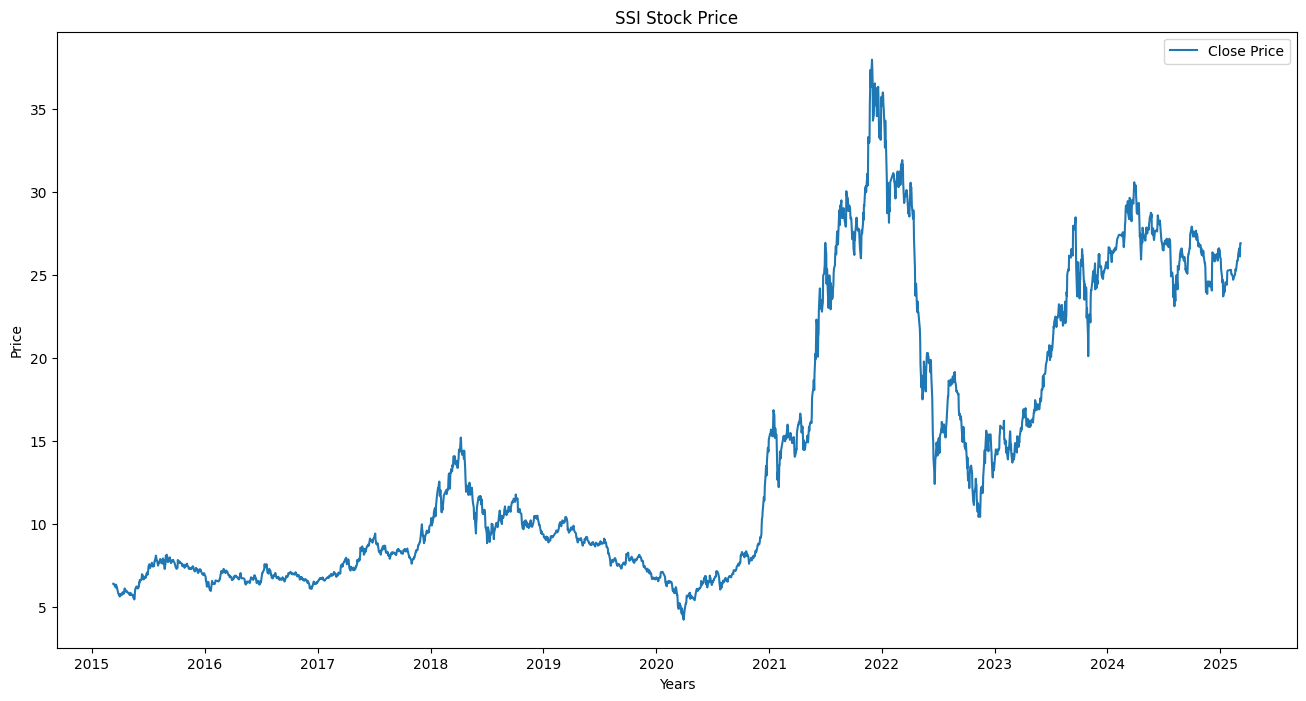

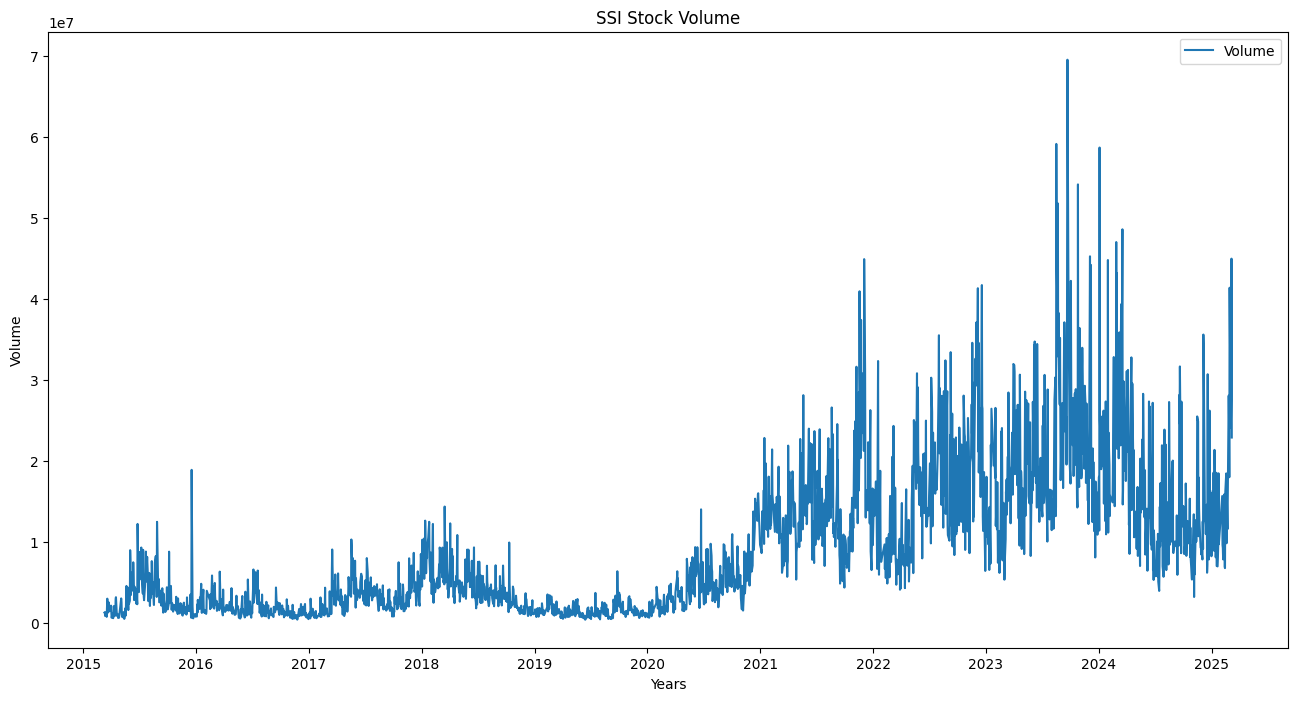

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot Stock Price
plt.figure(figsize=(16,8))
plt.plot(df['<Date>'], df['<Close>'], label='Close Price')
plt.title('SSI Stock Price')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend()

# Plot Stock Volume
plt.figure(figsize=(16,8))
plt.plot(df['<Date>'], df['<Volume>'], label='Volume')
plt.title('SSI Stock Volume')
plt.xlabel('Years')
plt.ylabel('Volume')
plt.legend()

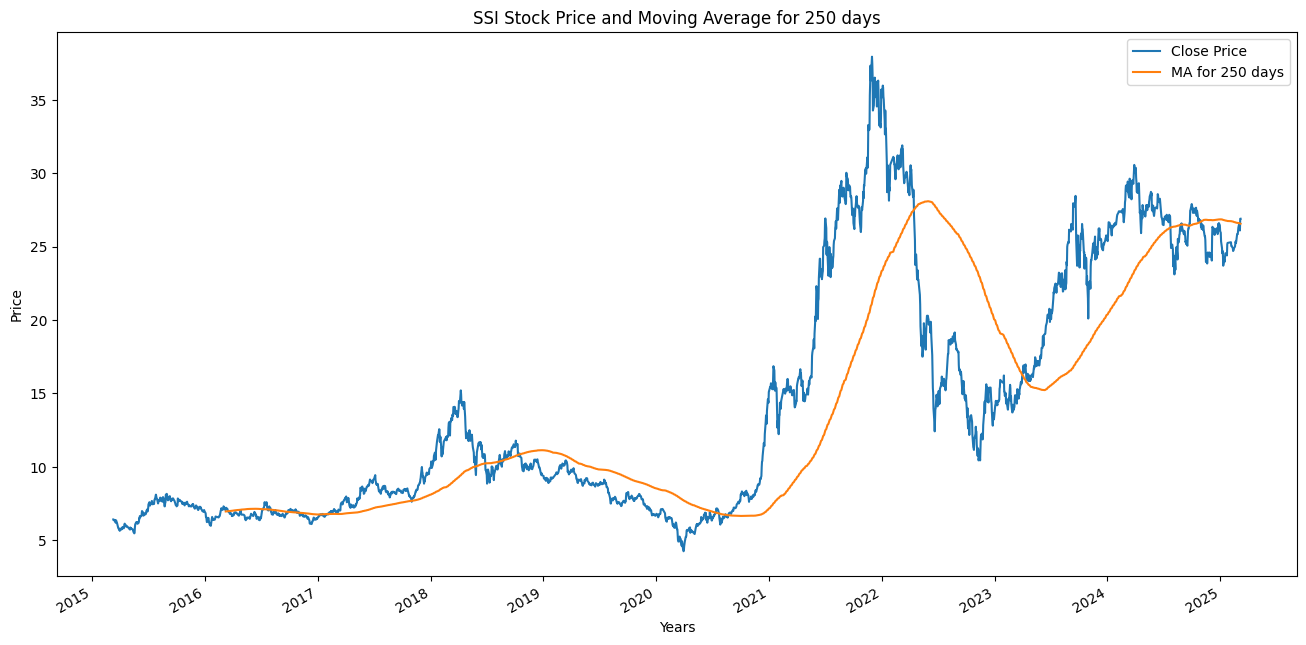

In [4]:
# Calculate Moving Average for 250 days
df['MA for 250 days'] = df['<Close>'].rolling(window=250).mean()
df['MA for 250 days'][0:250].tail()

plot_graph = df[['<Date>', '<Close>', 'MA for 250 days']].plot(x='<Date>', y=['<Close>', 'MA for 250 days'], figsize=(16,8))
plot_graph.set_title('SSI Stock Price and Moving Average for 250 days')
plot_graph.set_xlabel('Years')
plot_graph.set_ylabel('Price')
plot_graph.legend(['Close Price', 'MA for 250 days'])

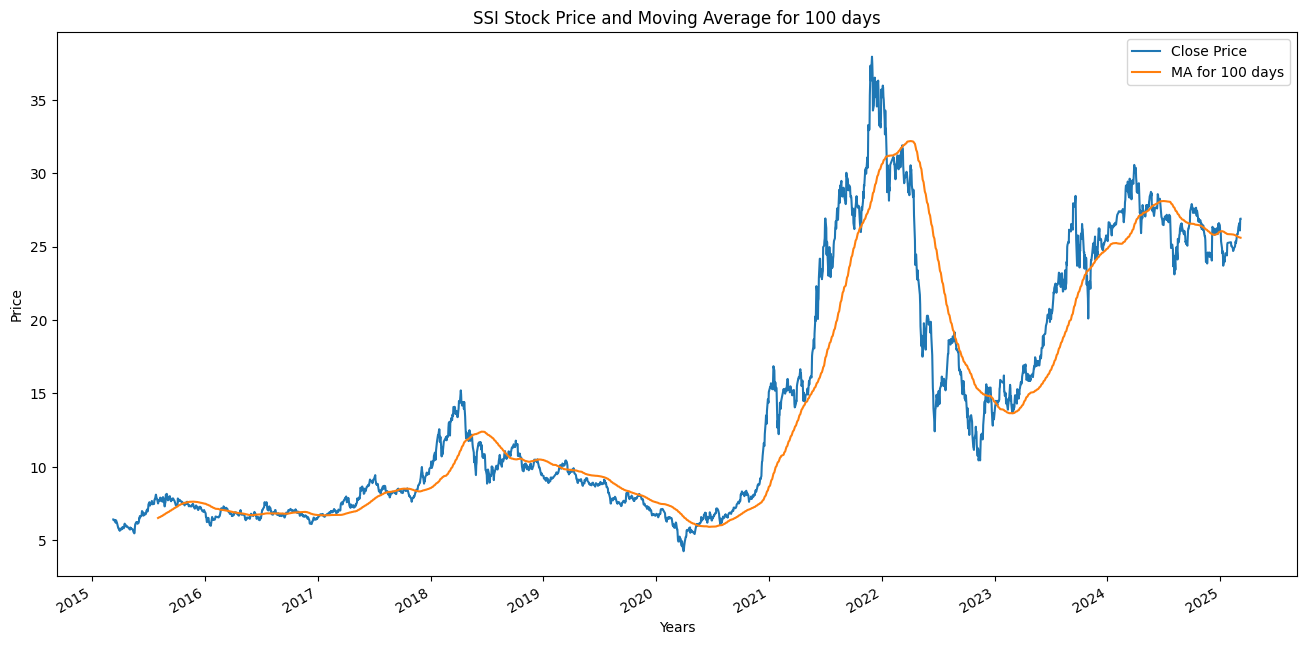

In [5]:
# Calculate Moving Average for 100 days
df['MA for 100 days'] = df['<Close>'].rolling(window=100).mean()
df['MA for 100 days'][0:100].tail()

plot_graph = df[['<Date>', '<Close>', 'MA for 100 days']].plot(x='<Date>', y=['<Close>', 'MA for 100 days'], figsize=(16,8))
plot_graph.set_title('SSI Stock Price and Moving Average for 100 days')
plot_graph.set_xlabel('Years')
plot_graph.set_ylabel('Price')
plot_graph.legend(['Close Price', 'MA for 100 days'])

Text(0, 0.5, 'Price')

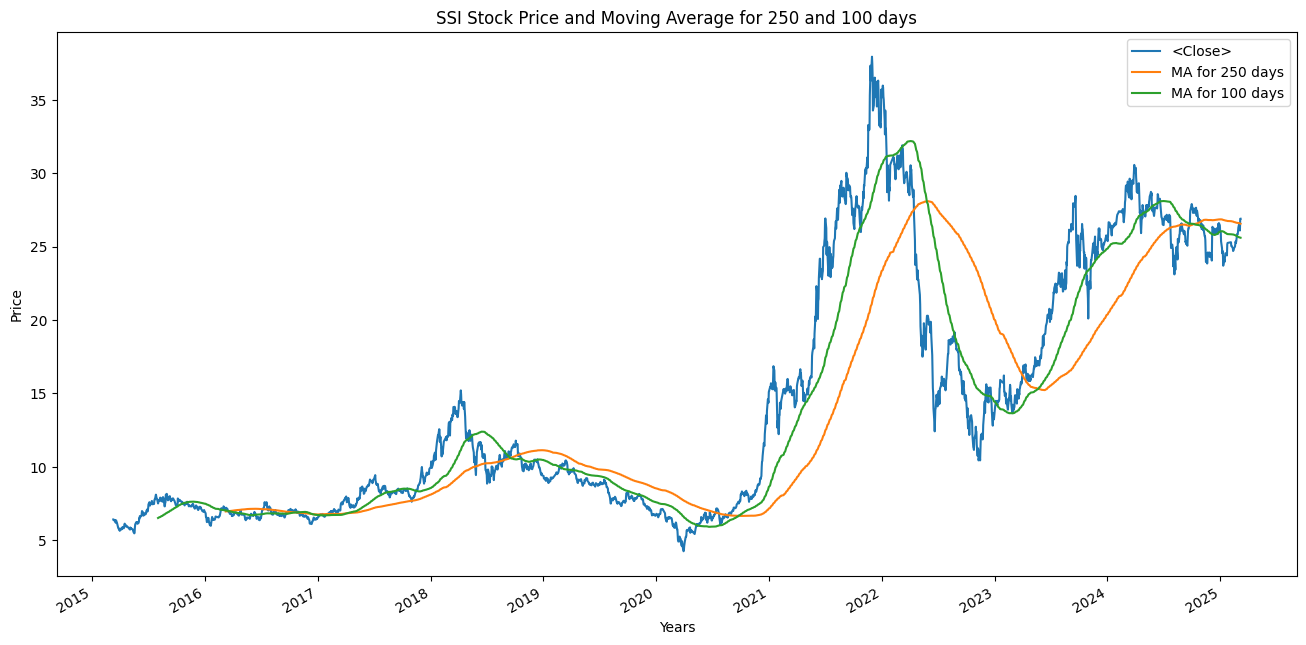

In [6]:
plot_graph = df[['<Date>', '<Close>', 'MA for 250 days', 'MA for 100 days']].plot(x='<Date>', y=['<Close>', 'MA for 250 days', 'MA for 100 days'], figsize=(16,8))
plot_graph.set_title('SSI Stock Price and Moving Average for 250 and 100 days')
plot_graph.set_xlabel('Years')
plot_graph.set_ylabel('Price')

In [7]:
df['Daily Return'] = df['<Close>'].pct_change()
df[['<Close>', 'Daily Return']].head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,<Close>,Daily Return
0,6.4163,NaN
1,6.4163,0.000000
2,6.3876,-0.004473
3,6.3017,-0.013448
4,6.3590,0.009093


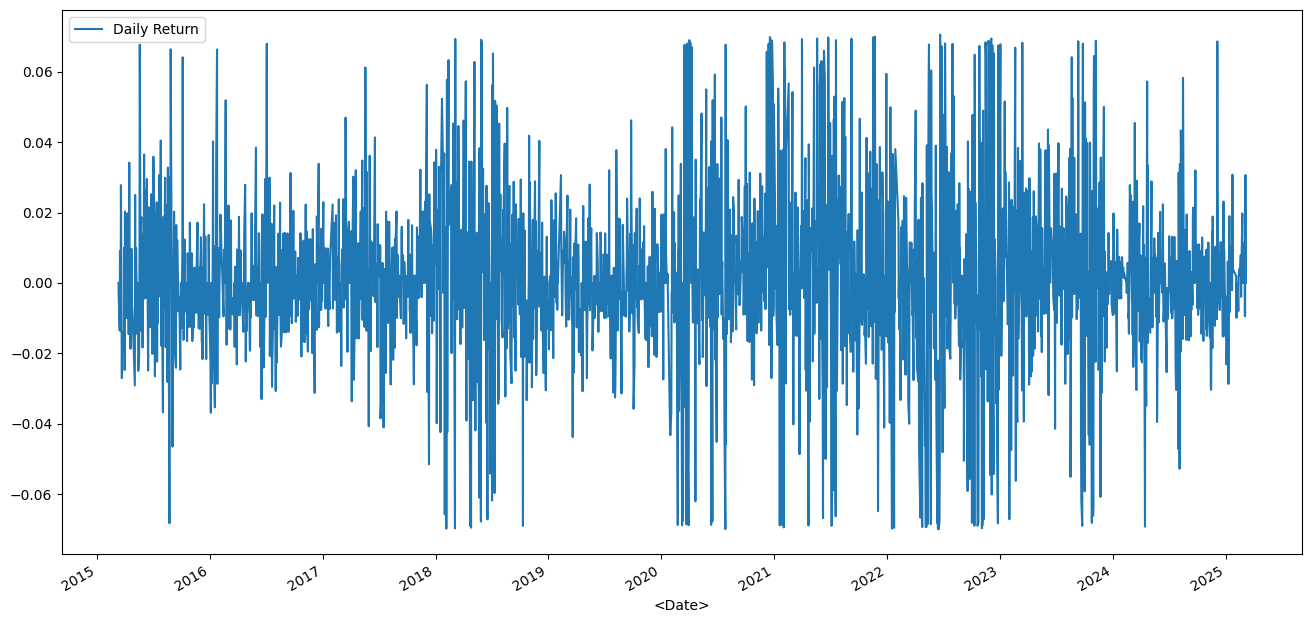

In [8]:
plot_graph = df[['<Date>', 'Daily Return']].plot(x='<Date>', y='Daily Return', figsize=(16,8))

In [9]:
Close_price = df['<Close>']
max(Close_price.values), min(Close_price.values)

(37.9354, 4.2514)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price.values.reshape(-1,1))
scaled_data

array([[0.06427087],
       [0.06427087],
       [0.06341883],
       ...,
       [0.64863437],
       [0.67238451],
       [0.67238451]])

In [11]:
len(scaled_data)

2497

In [12]:
x_train = []
y_train = []

for i in range(100, len(scaled_data)):
    x_train.append(scaled_data[i-100:i, 0])
    y_train.append(scaled_data[i, 0])

import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((2397, 100), (2397,))

In [13]:
splitting_length = int(len(scaled_data)*0.7)
x_train, x_test = x_train[:splitting_length], x_train[splitting_length:]
y_train, y_test = y_train[:splitting_length], y_train[splitting_length:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1747, 100), (1747,), (650, 100), (650,))

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1747/1747 ━━━━━━━━━━━━━━━━━━━━ 118s 66ms/step - loss: 0.0029


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [15]:
# Prepare data for LSTM model
data = df.filter(['<Close>'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .8))

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"RMSE: {rmse}")

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
RMSE: 0.8515302998635559


<ipython-input-15-70183aa052d9>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


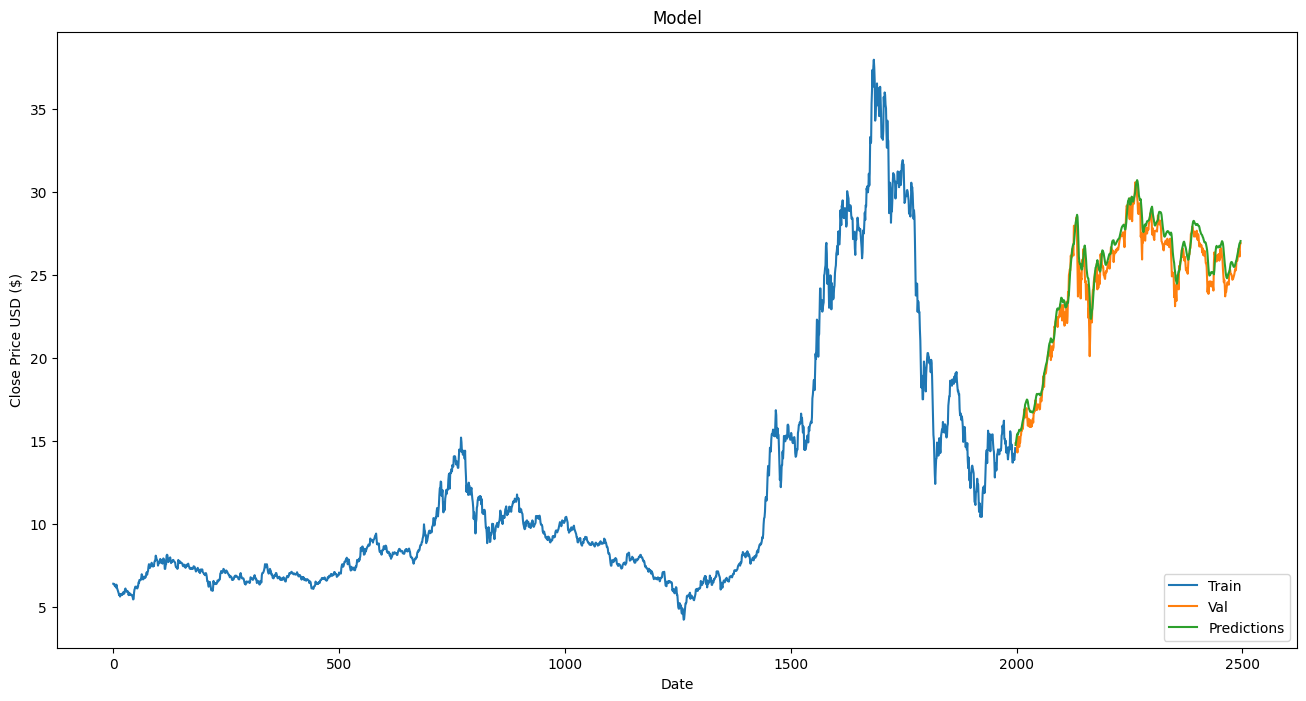

In [16]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['<Close>'])
plt.plot(valid[['<Close>', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()